In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(done)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import pandas as pd
from glob import glob

# Paths to your dataset
dataset_path = "/kaggle/input/arabic-egy-asr-16k/train"
csv_file_path = "/kaggle/input/arabic-egy-asr-16k/train.csv"

# Read the .csv file
data = pd.read_csv(csv_file_path)

# Dictionary to map audio IDs to transcripts
id_to_text = dict(zip(data['audio'], data['transcript']))

# Find all .wav files in the dataset path
wavs = glob(f"{dataset_path}/*.wav")

# Print the first few entries to verify
print(wavs[:5])
print(list(id_to_text.items())[:5])

['/kaggle/input/arabic-egy-asr-16k/train/train_sample_29416.wav', '/kaggle/input/arabic-egy-asr-16k/train/train_sample_24087.wav', '/kaggle/input/arabic-egy-asr-16k/train/train_sample_32680.wav', '/kaggle/input/arabic-egy-asr-16k/train/train_sample_1415.wav', '/kaggle/input/arabic-egy-asr-16k/train/train_sample_20050.wav']
[('train_sample_0', 'على إنها عار في الوقت اللي كانت بتتعامل مع أخويا الولد الوحيد معامله خاصه'), ('train_sample_1', 'فأكيد ربنا عوضهم خير هو الراجل بيبقى ليه إختيارات معينه إم وشايف إن دول الأنسب لمنتخب مصر في الفتره'), ('train_sample_2', 'زي دول كتيره بنشوفها النهارده في العالم وأصبحت هذه الدول أمثله للنجاح والتق'), ('train_sample_3', 'يعني مين اللي بيحط شروطها يعني أنا شايفه إني متوافقه مع كذا'), ('train_sample_4', 'والله هي الموضوع مش كليب خلي بالك ولا أغنيه الموضوع هو مشروع مشروع أنا قولت أعمله يعني اللي أنا أقدر عليه')]


In [3]:
def get_data(wavs, id_to_text, maxlen=50):
    """Returns mapping of audio paths and transcription texts"""
    data = []
    for w in wavs:
        # Extract the ID from the file name
        id = os.path.basename(w).split(".")[0]
        text = id_to_text.get(id)
        # Check if text is valid and meets length requirements
        if isinstance(text, str) and len(text) < maxlen:
            data.append({"audio": w, "text": text})
    return data

# Example usage
data = get_data(wavs, id_to_text, maxlen=247)

# Print the first few entries to verify
print(data[:5])

[{'audio': '/kaggle/input/arabic-egy-asr-16k/train/train_sample_29416.wav', 'text': 'مصر بتقف جنبه على مر العصور وعلى مر التاريخ علمت صحيح الوطن العربي كله وتاريخك'}, {'audio': '/kaggle/input/arabic-egy-asr-16k/train/train_sample_24087.wav', 'text': 'فقالولي تمام بس إحنا عايزينك تيجي هونج كونج تعيش في هونج كونج تشتغل هناك'}, {'audio': '/kaggle/input/arabic-egy-asr-16k/train/train_sample_32680.wav', 'text': 'كزبرة أوكي والتوم لمون وكزبره وتوم وتوم'}, {'audio': '/kaggle/input/arabic-egy-asr-16k/train/train_sample_1415.wav', 'text': 'بس مخدش حقه أوي لأن هو قعد حوالي سبع تمن سنين في الجيش و بعد كده اما طلع'}, {'audio': '/kaggle/input/arabic-egy-asr-16k/train/train_sample_20050.wav', 'text': 'ليه على ما المشهد يوضح قدامي على ما الصوره تكتمل'}]


In [4]:
class VectorizeChar:
    def __init__(self, max_len=50):
        # Define Arabic character set and common symbols
        self.vocab = (
            ["-", "#", "<", ">"]
            + [chr(i) for i in range(1569, 1611)]  # Arabic characters range
            + [" ", ".", ",", "؟", "ـ"]
        )
        self.max_len = max_len
        self.char_to_idx = {}
        for i, ch in enumerate(self.vocab):
            self.char_to_idx[ch] = i

    def __call__(self, text):
        text = text[: self.max_len - 2]
        text = "<" + text + ">"
        pad_len = self.max_len - len(text)
        return [self.char_to_idx.get(ch, 1) for ch in text] + [0] * pad_len

    def get_vocabulary(self):
        return self.vocab

# Initialize vectorizer
vectorizer = VectorizeChar(max_len=50)

# Example usage
text = "بلال شامة"
vectorized_text = vectorizer(text)
print(vectorized_text)

# Get vocabulary
vocab = vectorizer.get_vocabulary()
print(vocab)

[2, 11, 39, 10, 39, 46, 23, 10, 40, 12, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['-', '#', '<', '>', 'ء', 'آ', 'أ', 'ؤ', 'إ', 'ئ', 'ا', 'ب', 'ة', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ػ', 'ؼ', 'ؽ', 'ؾ', 'ؿ', 'ـ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى', 'ي', ' ', '.', ',', '؟', 'ـ']


In [5]:
max_target_len = 247
data = get_data(wavs, id_to_text, max_target_len)
vectorizer = VectorizeChar(max_target_len)
print("vocab size", len(vectorizer.get_vocabulary()))

vocab size 51


In [6]:
import tensorflow as tf

def create_text_ds(data, vectorizer):
    texts = [_["text"] for _ in data]
    text_ds = [vectorizer(t) for t in texts]
    text_ds = tf.data.Dataset.from_tensor_slices(text_ds)
    return text_ds

text_ds = create_text_ds(data, vectorizer)

2024-06-21 17:06:39.885567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 17:06:39.885661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 17:06:39.999886: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Max Pad Length: tf.Tensor(2558, shape=(), dtype=int32)


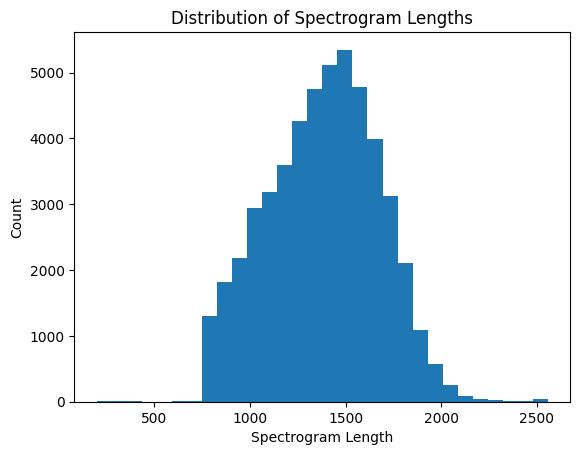

In [6]:
import matplotlib.pyplot as plt

# Function to calculate spectrogram length for a single audio file
def calculate_spectrogram_length(audio_path):
    audio = tf.io.read_file(audio_path)
    audio, _ = tf.audio.decode_wav(audio, 1)
    audio = tf.squeeze(audio, axis=-1)
    stfts = tf.signal.stft(audio, frame_length=200, frame_step=80, fft_length=256)
    spectrogram = tf.math.pow(tf.abs(stfts), 0.5)
    return tf.shape(spectrogram)[0]

# Function to iterate over folder and calculate max_pad_len
def calculate_max_pad_len(folder_path):
    max_length = 0
    wav_files = glob(os.path.join(folder_path, '*.wav'))
    for path in wav_files:
        length = calculate_spectrogram_length(path)
        if length > max_length:
            max_length = length
    return max_length

# Example folder path containing all .wav files
folder_path = '/kaggle/input/arabic-egy-asr-16k/train'

# Calculate max_pad_len
max_pad_len = calculate_max_pad_len(folder_path)
print("Max Pad Length:", max_pad_len)

# Optional: Plot length distribution
def plot_length_distribution(folder_path):
    wav_files = glob(os.path.join(folder_path, '*.wav'))
    lengths = [calculate_spectrogram_length(path) for path in wav_files]
    plt.hist(lengths, bins=30)
    plt.xlabel('Spectrogram Length')
    plt.ylabel('Count')
    plt.title('Distribution of Spectrogram Lengths')
    plt.show()

# Example usage to plot length distribution
plot_length_distribution(folder_path)

In [7]:
def path_to_audio(path, max_pad_len=2558):
    # Read and decode audio file
    audio = tf.io.read_file(path)
    audio, _ = tf.audio.decode_wav(audio, 1)
    audio = tf.squeeze(audio, axis=-1)
    
    # Compute STFT
    stfts = tf.signal.stft(audio, frame_length=200, frame_step=80, fft_length=256)
    x = tf.math.pow(tf.abs(stfts), 0.5)
    
    # Normalization
    means = tf.math.reduce_mean(x, 1, keepdims=True)
    stddevs = tf.math.reduce_std(x, 1, keepdims=True)
    x = (x - means) / (stddevs + 1e-6)  # Adding a small epsilon to avoid division by zero
    
    # Padding to max_pad_len frames
    audio_len = tf.shape(x)[0]
    pad_len = tf.maximum(max_pad_len - audio_len, 0)  # Ensure pad_len is non-negative
    paddings = tf.convert_to_tensor([[0, pad_len], [0, 0]], dtype=tf.int32)  # Convert to tensor with consistent dtype
    x = tf.pad(x, paddings, "CONSTANT")[:max_pad_len, :]
    
    return x

# Example usage
audio_path = "/kaggle/input/arabic-egy-asr-16k/train/train_sample_0.wav"
spectrogram = path_to_audio(audio_path)
print("Spectrogram shape:", spectrogram.shape)

Spectrogram shape: (2558, 129)


In [8]:
def create_audio_ds(data):
    flist = [_["audio"] for _ in data]  # Extract audio file paths from data
    audio_ds = tf.data.Dataset.from_tensor_slices(flist)  # Create dataset from paths
    audio_ds = audio_ds.map(path_to_audio, num_parallel_calls=tf.data.AUTOTUNE)  # Apply path_to_audio function
    return audio_ds

# Create audio dataset
audio_ds = create_audio_ds(data)

for spectrogram in audio_ds.take(1):
    print("Spectrogram shape:", spectrogram.shape)

Spectrogram shape: (2558, 129)


In [9]:
def create_tf_dataset(data, vectorizer, bs=4):
    # Step 1: Create audio dataset
    audio_ds = create_audio_ds(data)
    
    # Step 2: Create text dataset using the provided vectorizer
    text_ds = create_text_ds(data, vectorizer)
    
    # Step 3: Zip audio and text datasets together
    ds = tf.data.Dataset.zip((audio_ds, text_ds))
    
    # Step 4: Map to create final dataset format
    ds = ds.map(lambda x, y: {"source": x, "target": y})
    
    # Step 5: Batch the dataset
    ds = ds.batch(bs)
    
    # Step 6: Prefetch data for performance optimization
    ds = ds.prefetch(tf.data.AUTOTUNE)
    
    return ds

# Create vectorizer
vectorizer = VectorizeChar(max_len=51)

# Create TensorFlow dataset
dataset = create_tf_dataset(data, vectorizer, bs=4)

# Iterate over batches in the dataset
for batch in dataset.take(1):
    sources, targets = batch["source"], batch["target"]
    print("Sources batch shape:", sources.shape)
    print("Targets batch shape:", targets.shape)

Sources batch shape: (4, 2558, 129)
Targets batch shape: (4, 51)


In [10]:
split = int(len(data) * 0.99)
train_data = data[:split]
dev_data = data[split:]

# Create training dataset
train_ds = create_tf_dataset(train_data, vectorizer, bs=64)

# Create validation dataset
dev_ds = create_tf_dataset(dev_data, vectorizer, bs=4)

# Print dataset shapes
print("Training Dataset Shapes:")
for batch in train_ds.take(1):
    sources, targets = batch["source"], batch["target"]
    print("Sources batch shape:", sources.shape)
    print("Targets batch shape:", targets.shape)

print("\nValidation Dataset Shapes:")
for batch in dev_ds.take(1):
    sources, targets = batch["source"], batch["target"]
    print("Sources batch shape:", sources.shape)
    print("Targets batch shape:", targets.shape)

Training Dataset Shapes:
Sources batch shape: (64, 2558, 129)
Targets batch shape: (64, 51)

Validation Dataset Shapes:
Sources batch shape: (4, 2558, 129)
Targets batch shape: (4, 51)


In [11]:
import keras
from keras import layers

class TextEmbedding(layers.Layer):
    def __init__(self, num_vocab=1000, maxlen=100, num_hid=64):
        super().__init__()
        self.emb = keras.layers.Embedding(num_vocab, num_hid)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=num_hid)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        x = self.emb(x)
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        return x + positions

In [12]:
class AudioFeatureExtraction(layers.Layer):
    def __init__(self, num_hid=64, maxlen=100):
        super().__init__()
        self.conv1 = keras.layers.Conv1D(
            num_hid, 11, strides=2, padding="same", activation="relu"
        )
        self.conv2 = keras.layers.Conv1D(
            num_hid, 11, strides=2, padding="same", activation="relu"
        )
        self.conv3 = keras.layers.Conv1D(
            num_hid, 11, strides=2, padding="same", activation="relu"
        )

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return self.conv3(x)

In [13]:
class Encoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, feed_forward_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [
                layers.Dense(feed_forward_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [14]:
class Decoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, feed_forward_dim, dropout_rate=0.1):
        super().__init__()
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = layers.LayerNormalization(epsilon=1e-6)
        self.self_att = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.enc_att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.self_dropout = layers.Dropout(0.5)
        self.enc_dropout = layers.Dropout(0.1)
        self.ffn_dropout = layers.Dropout(0.1)
        self.ffn = keras.Sequential(
            [
                layers.Dense(feed_forward_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )

    def causal_attention_mask(self, batch_size, n_dest, n_src, dtype):
        i = tf.range(n_dest)[:, None]
        j = tf.range(n_src)
        m = i >= j - n_src + n_dest
        mask = tf.cast(m, dtype)
        mask = tf.reshape(mask, [1, n_dest, n_src])
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], 0
        )
        return tf.tile(mask, mult)

    def call(self, enc_out, target):
        input_shape = tf.shape(target)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        causal_mask = self.causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)
        target_att = self.self_att(target, target, attention_mask=causal_mask)
        target_norm = self.layernorm1(target + self.self_dropout(target_att))
        enc_out = self.enc_att(target_norm, enc_out)
        enc_out_norm = self.layernorm2(self.enc_dropout(enc_out) + target_norm)
        ffn_out = self.ffn(enc_out_norm)
        ffn_out_norm = self.layernorm3(enc_out_norm + self.ffn_dropout(ffn_out))
        return ffn_out_norm

In [15]:
class Transformer(keras.Model):
    def __init__(
        self,
        num_hid=64,
        num_head=2,
        num_feed_forward=128,
        source_maxlen=100,
        target_maxlen=100,
        num_layers_enc=4,
        num_layers_dec=1,
        num_classes=10,
    ):
        super().__init__()
        self.loss_metric = keras.metrics.Mean(name="loss")
        self.num_layers_enc = num_layers_enc
        self.num_layers_dec = num_layers_dec
        self.target_maxlen = target_maxlen
        self.num_classes = num_classes

        self.enc_input = AudioFeatureExtraction(num_hid=num_hid, maxlen=source_maxlen)
        self.dec_input = TextEmbedding(
            num_vocab=num_classes, maxlen=target_maxlen, num_hid=num_hid
        )

        self.encoder = keras.Sequential(
            [self.enc_input]
            + [
                Encoder(num_hid, num_head, num_feed_forward)
                for _ in range(num_layers_enc)
            ]
        )

        for i in range(num_layers_dec):
            setattr(
                self,
                f"dec_layer_{i}",
                Decoder(num_hid, num_head, num_feed_forward),
            )

        self.classifier = layers.Dense(num_classes)

    def decode(self, enc_out, target):
        y = self.dec_input(target)
        for i in range(self.num_layers_dec):
            y = getattr(self, f"dec_layer_{i}")(enc_out, y)
        return y

    def call(self, inputs):
        source = inputs[0]
        target = inputs[1]
        x = self.encoder(source)
        y = self.decode(x, target)
        return self.classifier(y)

    @property
    def metrics(self):
        return [self.loss_metric]

    def train_step(self, batch):
        source = batch["source"]
        target = batch["target"]
        dec_input = target[:, :-1]
        dec_target = target[:, 1:]
        with tf.GradientTape() as tape:
            preds = self([source, dec_input])
            one_hot = tf.one_hot(dec_target, depth=self.num_classes)
            mask = tf.math.logical_not(tf.math.equal(dec_target, 0))
            loss = model.compute_loss(None, one_hot, preds, sample_weight=mask)
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        self.loss_metric.update_state(loss)
        return {"loss": self.loss_metric.result()}

    def test_step(self, batch):
        source = batch["source"]
        target = batch["target"]
        dec_input = target[:, :-1]
        dec_target = target[:, 1:]
        preds = self([source, dec_input])
        one_hot = tf.one_hot(dec_target, depth=self.num_classes)
        mask = tf.math.logical_not(tf.math.equal(dec_target, 0))
        loss = model.compute_loss(None, one_hot, preds, sample_weight=mask)
        self.loss_metric.update_state(loss)
        return {"loss": self.loss_metric.result()}

    def generate(self, source, target_start_token_idx):
        bs = tf.shape(source)[0]
        enc = self.encoder(source)
        dec_input = tf.ones((bs, 1), dtype=tf.int32) * target_start_token_idx
        dec_logits = []
        for i in range(self.target_maxlen - 1):
            dec_out = self.decode(enc, dec_input)
            logits = self.classifier(dec_out)
            logits = tf.argmax(logits, axis=-1, output_type=tf.int32)
            last_logit = tf.expand_dims(logits[:, -1], axis=-1)
            dec_logits.append(last_logit)
            dec_input = tf.concat([dec_input, last_logit], axis=-1)
        return dec_input

In [16]:
class DisplayOutputs(keras.callbacks.Callback):
    def __init__(
        self, batch, idx_to_token, target_start_token_idx=27, target_end_token_idx=28
    ):
        self.batch = batch
        self.target_start_token_idx = target_start_token_idx
        self.target_end_token_idx = target_end_token_idx
        self.idx_to_char = idx_to_token

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 != 0:
            return
        source = self.batch["source"]
        target = self.batch["target"].numpy()
        bs = tf.shape(source)[0]
        preds = self.model.generate(source, self.target_start_token_idx)
        preds = preds.numpy()
        for i in range(bs):
            target_text = "".join([self.idx_to_char[_] for _ in target[i, :]])
            prediction = ""
            for idx in preds[i, :]:
                prediction += self.idx_to_char[idx]
                if idx == self.target_end_token_idx:
                    break
            print(f"target:     {target_text.replace('-','')}")
            print(f"prediction: {prediction}\n")

In [17]:
class CustomSchedule(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self,
        init_lr=0.00001,
        lr_after_warmup=0.001,
        final_lr=0.00001,
        warmup_epochs=15,
        decay_epochs=85,
        steps_per_epoch=203,
    ):
        super().__init__()
        self.init_lr = init_lr
        self.lr_after_warmup = lr_after_warmup
        self.final_lr = final_lr
        self.warmup_epochs = warmup_epochs
        self.decay_epochs = decay_epochs
        self.steps_per_epoch = steps_per_epoch

    def calculate_lr(self, epoch):
        """linear warm up - linear decay"""
        warmup_lr = (
            self.init_lr
            + ((self.lr_after_warmup - self.init_lr) / (self.warmup_epochs - 1)) * epoch
        )
        decay_lr = tf.math.maximum(
            self.final_lr,
            self.lr_after_warmup
            - (epoch - self.warmup_epochs)
            * (self.lr_after_warmup - self.final_lr)
            / self.decay_epochs,
        )
        return tf.math.minimum(warmup_lr, decay_lr)

    def __call__(self, step):
        epoch = step // self.steps_per_epoch
        epoch = tf.cast(epoch, "float32")
        return self.calculate_lr(epoch)

In [11]:
batch = next(iter(dev_ds))

idx_to_char = vectorizer.get_vocabulary()
display_cb = DisplayOutputs(
    batch, idx_to_char, target_start_token_idx=2, target_end_token_idx=3
)

keras.utils.set_random_seed(123)
model = Transformer(
    num_hid=200,
    num_head=2,
    num_feed_forward=400,
    target_maxlen=247,
    num_layers_enc=4,
    num_layers_dec=1,
    num_classes=51,
)
loss_fn = keras.losses.CategoricalCrossentropy(
    from_logits=True,
    label_smoothing=0.1,
)

learning_rate = CustomSchedule(
    init_lr=0.00001,
    lr_after_warmup=0.001,
    final_lr=0.00001,
    warmup_epochs=15,
    decay_epochs=85,
    steps_per_epoch=len(train_ds),
)
optimizer = keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss=loss_fn)

history = model.fit(train_ds, validation_data=dev_ds, callbacks=[display_cb], epochs=16)

Epoch 1/16
  1/785 ━━━━━━━━━━━━━━━━━━━━ 7:50:43 36s/step - loss: 4.3555

I0000 00:00:1718986496.568694     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718986496.607809     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


785/785 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 3.2053

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (4, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


target:     <الحاجه المرعبه وطبعا إحنا كويس إن إنت بتتكلم على >
prediction: <وال ال ال ال الي ال ال الي المالي الي ال الي الي >

target:     <أو المؤسسات ونظام المنظومه الدوليه الأمم المتحده >
prediction: <وال ال ال ال الي ال ال الي المالي الي ال الي الي >

target:     <يعني بتمضي على نفسك شرط جزائي ولا لأ>
prediction: <وال ال ال ال الي ال ال الي المالي الي ال الي الي >

target:     <إنه ما حدث في تونس ليس بعيدا عن هذه القاعه ثم الم>
prediction: <وال ال ال ال الي ال ال الي المالي الي ال الي الي >

785/785 ━━━━━━━━━━━━━━━━━━━━ 286s 318ms/step - loss: 3.2049 - val_loss: 2.7405
Epoch 2/16
785/785 ━━━━━━━━━━━━━━━━━━━━ 163s 208ms/step - loss: 2.6805 - val_loss: 2.6219
Epoch 3/16
785/785 ━━━━━━━━━━━━━━━━━━━━ 164s 208ms/step - loss: 2.6120 - val_loss: 2.5476
Epoch 4/16
785/785 ━━━━━━━━━━━━━━━━━━━━ 164s 208ms/step - loss: 2.4704 - val_loss: 2.2682
Epoch 5/16
785/785 ━━━━━━━━━━━━━━━━━━━━ 164s 208ms/step - loss: 2.2226 - val_loss: 2.0830
Epoch 6/16
785/785 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - lo